In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from support_vector_machine import LinearSVM, Kernel, KernelSVM

## Linear SVM Test & Comparison (Breast Cancer Dataset)

In [10]:
X, y = load_breast_cancer(return_X_y=True)
y = 2 * (y == 1) - 1  # Convert to {-1, +1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

svm_linear = LinearSVM(C=1.0, learning_rate=0.001, max_iters=1000)
svm_linear.fit(X_train, y_train)
print("LinearSVM (Gradient Descent) Accuracy:", svm_linear.score(X_test, y_test))

svm_sk = SVC(kernel='linear', C=1.0)
svm_sk.fit(X_train, y_train)
print("Sklearn LinearSVM Accuracy:", svm_sk.score(X_test, y_test))

LinearSVM (Gradient Descent) Accuracy: 0.9590643274853801
Sklearn LinearSVM Accuracy: 0.9766081871345029


## Kernel SVM Test & Comparison (Moon & Circle Dataset)

In [11]:
def plot_decision_boundary(model, X, y, title="", resolution=200):
    X = np.asarray(X)
    y = np.asarray(y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[-np.inf, 0, np.inf], colors=['#FFAAAA', '#AAFFAA'], alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
    plt.title(title)
    plt.grid(True)
    plt.show()

In [12]:
def test_kernel_svm(dataset="moons", name="linear", kernel=Kernel.linear, kernel_params={}):
    if dataset == 'moons':
        X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
    elif dataset == 'circles':
        X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)

    y = 2 * y - 1  # Convert to {-1, +1}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    svm_kernel = KernelSVM(C=1.0, kernel=kernel, kernel_params=kernel_params)
    svm_kernel.fit(X_train, y_train)
    print(f"Custom {name} KernelSVM Accuracy:", svm_kernel.score(X_test, y_test))

    smv_sk = SVC(kernel=name.lower(), C=1.0, **kernel_params)
    smv_sk.fit(X_train, y_train)
    print(f"Sklearn {name} KernelSVM Accuracy:", smv_sk.score(X_test, y_test))

    plot_decision_boundary(svm_kernel, X_test, y_test, title=f"Custom KernelSVM ({name})")
    plot_decision_boundary(smv_sk, X_test, y_test, title=f"Sklearn SVM ({name})")

Custom poly KernelSVM Accuracy: 0.9777777777777777
Sklearn poly KernelSVM Accuracy: 0.9111111111111111


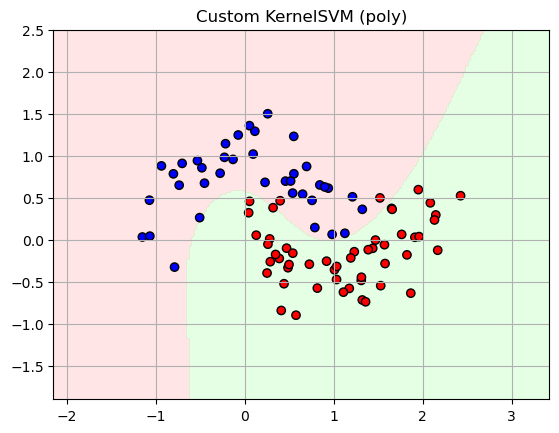

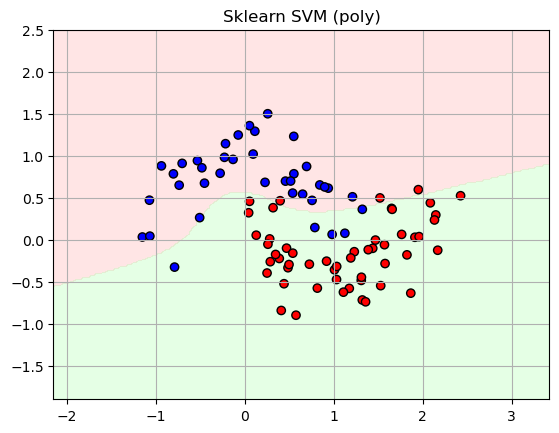

Custom poly KernelSVM Accuracy: 1.0
Sklearn poly KernelSVM Accuracy: 0.4222222222222222


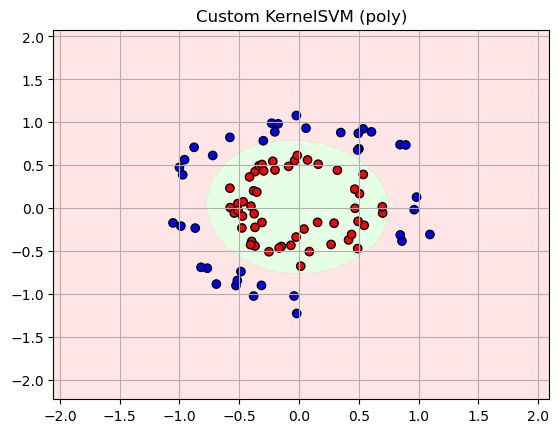

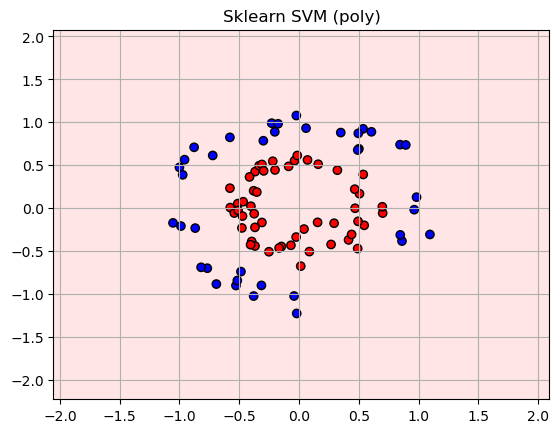

In [13]:
test_kernel_svm(dataset="moons", name="poly", kernel=Kernel.polynomial)
test_kernel_svm(dataset="circles", name="poly", kernel=Kernel.polynomial)

Custom linear KernelSVM Accuracy: 0.8888888888888888
Sklearn linear KernelSVM Accuracy: 0.9


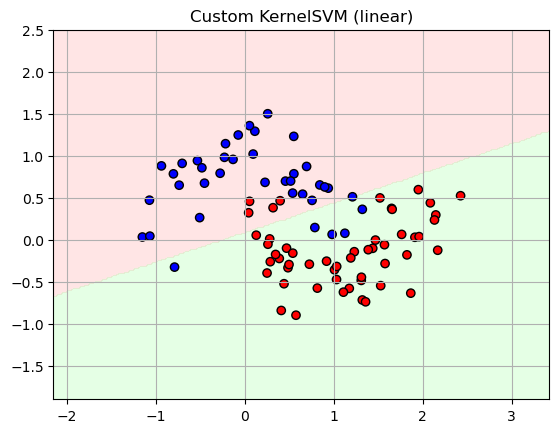

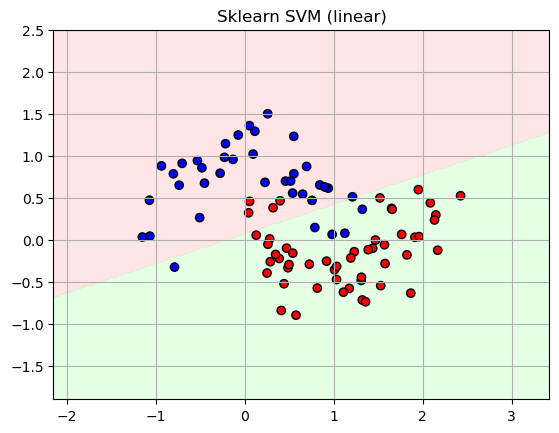

Custom linear KernelSVM Accuracy: 0.4222222222222222
Sklearn linear KernelSVM Accuracy: 0.4222222222222222


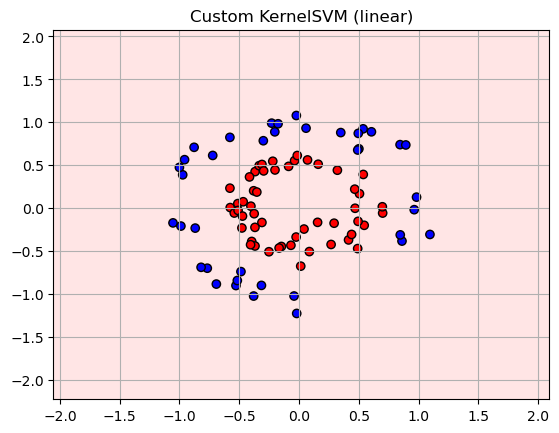

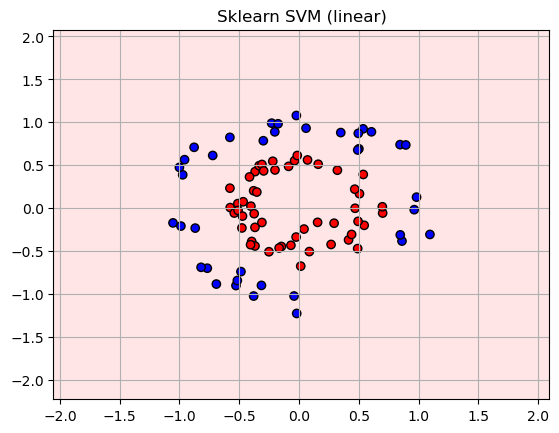

In [14]:
test_kernel_svm(dataset="moons", name="linear", kernel=Kernel.linear)
test_kernel_svm(dataset="circles", name="linear", kernel=Kernel.linear)

Custom rbf KernelSVM Accuracy: 0.9888888888888889
Sklearn rbf KernelSVM Accuracy: 0.9666666666666667


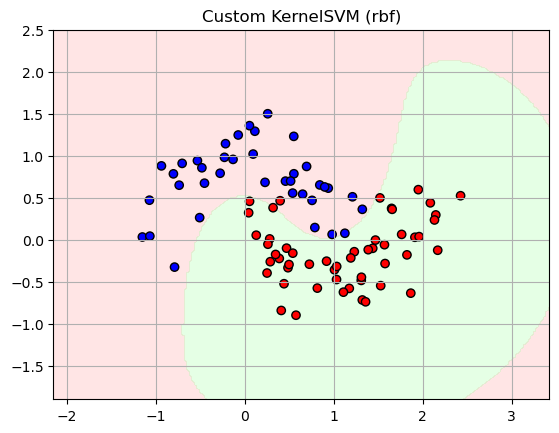

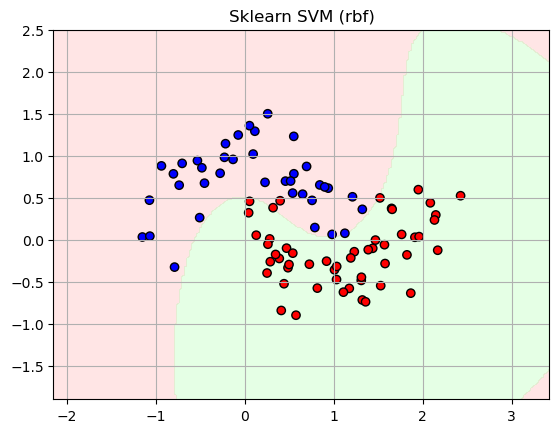

Custom rbf KernelSVM Accuracy: 1.0
Sklearn rbf KernelSVM Accuracy: 1.0


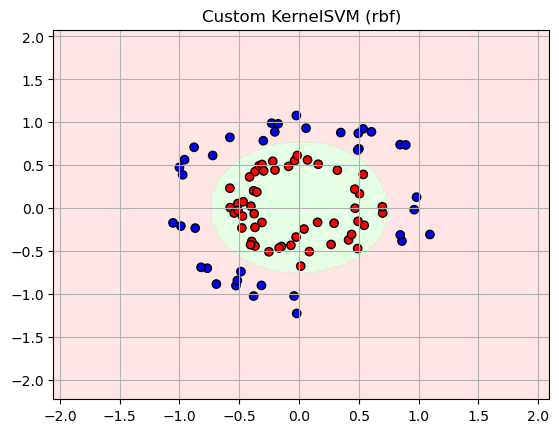

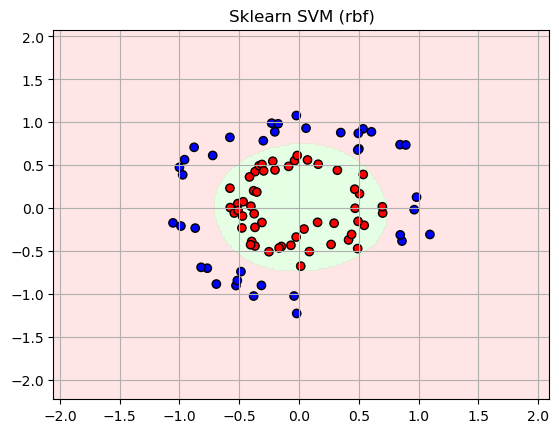

In [15]:
test_kernel_svm(dataset="moons", name="rbf", kernel=Kernel.rbf)
test_kernel_svm(dataset="circles", name="rbf", kernel=Kernel.rbf)

Custom sigmoid KernelSVM Accuracy: 0.8555555555555555
Sklearn sigmoid KernelSVM Accuracy: 0.6444444444444445


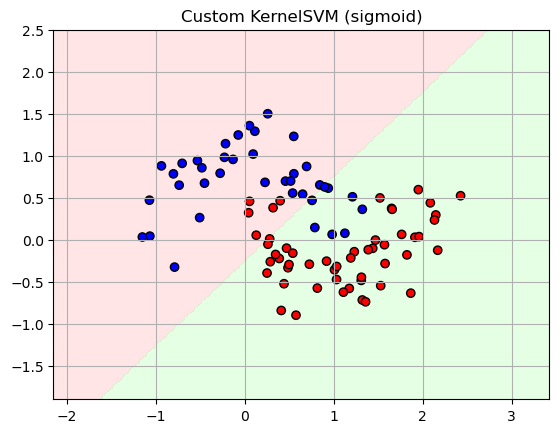

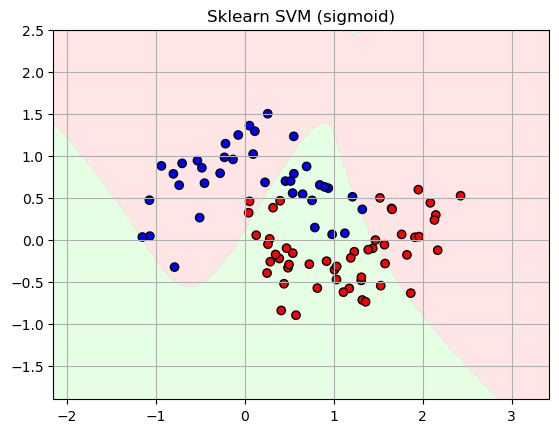

Custom sigmoid KernelSVM Accuracy: 0.4222222222222222
Sklearn sigmoid KernelSVM Accuracy: 0.5444444444444444


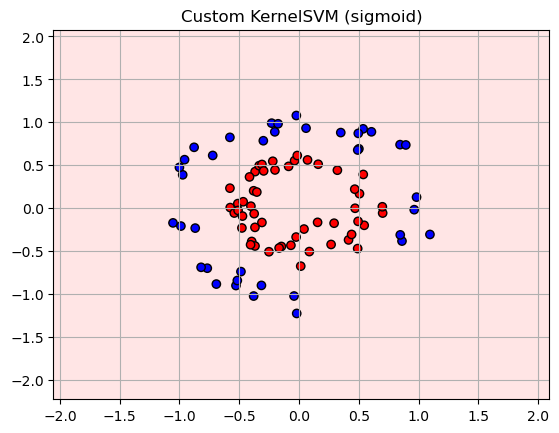

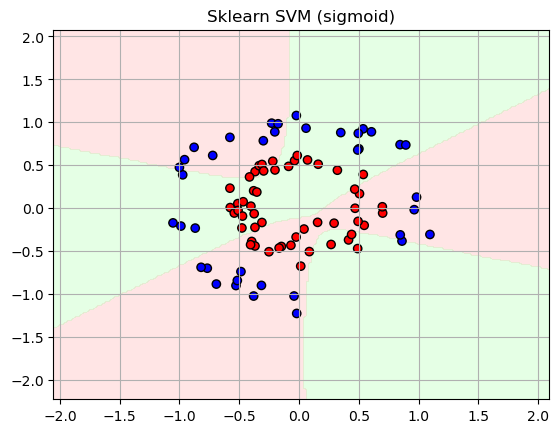

In [16]:
test_kernel_svm(dataset="moons", name="sigmoid", kernel=Kernel.sigmoid)
test_kernel_svm(dataset="circles", name="sigmoid", kernel=Kernel.sigmoid)